In [98]:
!pip install imblearn

     |████████████████████████████████| 163 kB 1.8 MB/s eta 0:00:01


In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [67]:
input_data = pd.read_csv("bank-additional-full.csv",sep=";")
input_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
print(input_data['y'].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


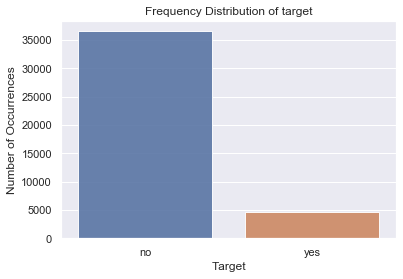

In [12]:
target_count = input_data['y'].value_counts()
sns.set(style="darkgrid")
sns.barplot(target_count.index, target_count.values, alpha=0.9)
plt.title('Frequency Distribution of target')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.show()

In [13]:
input_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [14]:
in_yes = input_data[input_data['y']=='yes']
in_yes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


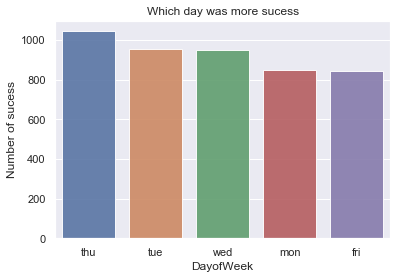

In [18]:
target_count = in_yes['day_of_week'].value_counts()
sns.set(style="darkgrid")
sns.barplot(target_count.index, target_count.values, alpha=0.9)
plt.title('Which day was more sucess')
plt.ylabel('Number of sucess', fontsize=12)
plt.xlabel('DayofWeek', fontsize=12)
plt.show()

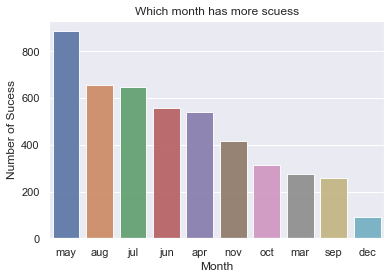

In [24]:
target_count = in_yes['month'].value_counts()
sns.set(style="darkgrid")
sns.barplot(target_count.index, target_count.values, alpha=0.9)
plt.title('Which month has more scuess')
plt.ylabel('Number of Sucess', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

In [20]:
in_no = input_data[input_data['y']=='no']
in_no

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


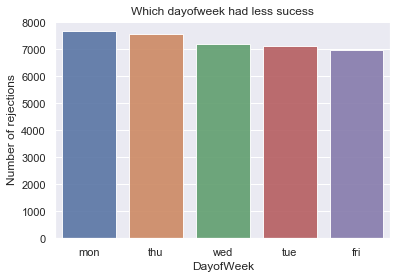

In [25]:
target_count = in_no['day_of_week'].value_counts()
sns.set(style="darkgrid")
sns.barplot(target_count.index, target_count.values, alpha=0.9)
plt.title('Which dayofweek had less sucess')
plt.ylabel('Number of rejections', fontsize=12)
plt.xlabel('DayofWeek', fontsize=12)
plt.show()

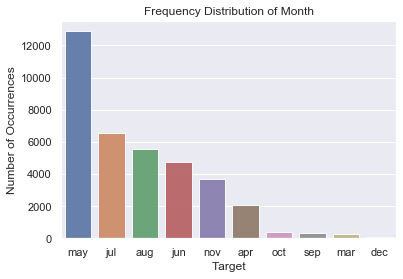

In [22]:
target_count = in_no['month'].value_counts()
sns.set(style="darkgrid")
sns.barplot(target_count.index, target_count.values, alpha=0.9)
plt.title('Frequency Distribution of Month')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.show()

In [36]:
#input_data['y'] = input_data['y'].astype('category')
#input_data['marital'] = input_data['marital'].astype('category')

In [46]:
input_data['y'] = input_data['y'].replace({'yes':1, 'no':0})

In [39]:
input_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


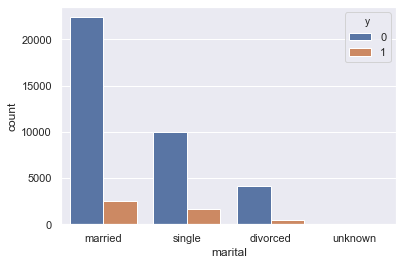

In [49]:
sns.countplot(x='marital',hue='y',data=input_data)

In [50]:
input_data.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
#count = pd.DataFrame()
found=list()
for index,value in input_data.items():
    found=0
    if(input_data[index].dtypes not in ('int64','float64')):
        input_data.drop(input_data.loc[input_data[index]=='unknown'].index, inplace=True) 
#print(count)

In [69]:
input_data[input_data.job.str.contains('unknown')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [72]:
input_data.shape

(30488, 21)

#### Distribution of response over different levels of Education

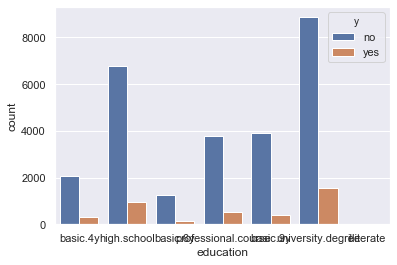

In [73]:
sns.countplot(x='education',hue='y',data=input_data)

## Converting all Object data type to Categorical and then use cat.codes

In [ ]:
obj_types = input_data.select_dtypes(include = ['object']).copy()
obj_types

In [ ]:
for index,v in obj_types.items():
    input_data[index] = input_data[index].astype('category')
    input_data[index] = input_data[index].cat.codes

In [88]:
y = input_data['y']
X = input_data.drop('y',axis=1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [90]:
X_train.shape

(20426, 20)

In [91]:
X_test.shape

(10062, 20)

## Logistic Regression

In [147]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
log_reg.score(X_train,y_train)

0.8578870714765853

In [149]:
#log_reg.fit(X_test,y_test)
out = log_reg.predict(X_test)

In [150]:
log_reg_score = log_reg.score(X_test,y_test)
print(log_reg_score)

0.8465513814351023

Accuracy is 0.846

Confusion matrix

In [152]:
confusion_matrix = metrics.confusion_matrix(y_test, out)
print(confusion_matrix)

[[7448 1329]
 [ 215 1070]]


Data is higly imbalances. Trying smote to balance data and then test

In [102]:
y_train.value_counts()

0    17852
1     2574
Name: y, dtype: int64

In [156]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts()

1    17852
0    17852
Name: y, dtype: int64

## Logistic Regression

In [157]:
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
 log_reg_smote.score(X_train,y_train)

0.8578870714765853

In [162]:
smote_pred = log_reg_smote.predict(X_test)
LR_smote_score = log_reg_smote.score(X_test,y_test)
print(LR_smote_score)

0.8465513814351023

In [163]:
confusion_matrix = metrics.confusion_matrix(y_test, smote_pred)
print(confusion_matrix)

[[7448 1329]
 [ 215 1070]]


Using PCA

In [134]:
s = StandardScaler()
x = s.fit_transform(X_train)
x_test = s.transform(X_test)

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [129]:
finalDf = pd.concat([principalDf, y_train], axis = 1)

In [130]:
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,y
0,-1.018723,-0.908020,4.062874,-1.161139,0
1,0.449535,-0.384992,0.302896,0.006580,0
2,0.635389,-0.339503,0.049645,-0.859166,0
3,-0.639537,-1.450640,-2.337361,1.129814,1
4,1.993633,1.055642,0.415734,-1.449742,0
...,...,...,...,...,...
35699,-3.633395,4.894736,0.524204,-0.222287,1
35700,-0.829823,-1.366827,-1.719244,0.367011,1
35701,-1.114269,-1.149905,1.873543,0.467242,1
35702,1.773187,0.127032,1.212729,0.778108,1


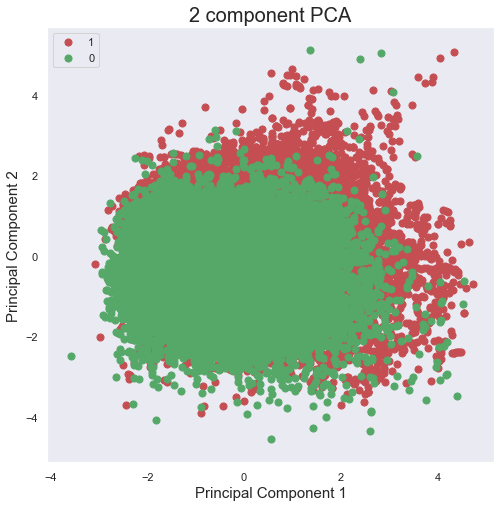

In [131]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [123]:
finalDf['y'].dtype

dtype('int8')

In [132]:
pca.explained_variance_ratio_

array([0.2032084 , 0.09777184, 0.077614  , 0.06457615])

## Linear Discriminant Analysis

In [164]:
lda = LDA(n_components=1)

In [165]:
lda.fit_transform(X_train,y_train)

array([[-1.04610855],
       [-0.55371226],
       [-1.28454317],
       ...,
       [ 0.11099185],
       [-0.24232557],
       [ 1.55228747]])

In [166]:
lda.score(X_train,y_train)

0.8698465157965494

In [167]:
test_pred = lda.predict(X_test)

In [168]:
lda_score = lda.score(X_test,y_test)
print(lda_score)

0.8583780560524746

Accuracy using LDA is 0.8583 

In [169]:
confusion_matrix = metrics.confusion_matrix(y_test, test_pred)
print(confusion_matrix)

[[7709 1068]
 [ 357  928]]


## Random Forest

In [172]:
rf = RandomForestClassifier(n_estimators=100)
rf_fit = rf.fit(X_train,y_train)
rf_fit

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
rf_fit.score(X_train,y_train)

1.0

In [174]:
rf_preds = rf_fit.predict(X_test)
rf_score = rf_fit.score(X_test,y_test)
print(rf_score)

0.8999204929437488


In [175]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_preds)
print(confusion_matrix)

[[8216  561]
 [ 446  839]]
